In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

# Context

In [268]:
train_df = pd.read_csv('train.csv', encoding = 'unicode_escape')
sns.set(rc={'figure.figsize':(10.0,8.0)})

# Data quality assessment

In [269]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [270]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


В датасете представлены следующие переменные: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
- Категориальные: Survived, Sex, Embarked, Pclass
- Числовые:  
   - Непрерывные: Age, Fare
   - Дискретные: SibSp, Parch

In [271]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [272]:
# доля нулевых значений
pd.DataFrame(data={"Nul_val" : train_df.isnull().sum() / len(train_df),
                   "nunique" : train_df.nunique() / len(train_df)})

,Nul_val,nunique
PassengerId,0.00000,1.00000
Survived,0.00000,0.00002
Pclass,0.00000,0.00003
Name,0.00000,0.92144
Sex,0.00000,0.00002
Age,0.03292,0.00173
SibSp,0.00000,0.00007
Parch,0.00000,0.00008
Ticket,0.04623,0.75331
Fare,0.00134,0.15935


Присутствуют пустые значения в переменных: Age, Ticket, Fare, Embarked.
В переменной Cabin более 60 % значений являются пустыми, поэтому анализ данной переменной производится не будет.

### Fill missing values

In [273]:
train_df1 = train_df.copy()

#Удаление переменной Cabin

train_df1.drop(axis=1, columns="Cabin", inplace=True)

#Заполнение недостающих значений в Age в соответствии с классами по среднему.

P1 = train_df1[train_df["Pclass"] == 1 & train_df1["Age"].notnull()]
P2 = train_df1[(train_df1["Pclass"] == 2) & (train_df1["Age"].notnull())]
P3 = train_df1[(train_df1["Pclass"] == 3) & (train_df1["Age"].notnull())]
train_df1.loc[(train_df1["Pclass"] == 1) & (train_df1["Age"].isnull()), "Age"] = np.mean(P1["Age"])
train_df1.loc[(train_df1["Pclass"] == 2) & (train_df1["Age"].isnull()), "Age"] = np.mean(P2["Age"])
train_df1.loc[(train_df1["Pclass"] == 3) & (train_df1["Age"].isnull()), "Age"] = np.mean(P3["Age"])

#Заполнение недостающих значений в Fare в соответствии с классами по среднему.

F1 = train_df1[(train_df["Pclass"] == 1) & (train_df1["Fare"].notnull())]
F2 = train_df1[(train_df1["Pclass"] == 2) & (train_df1["Fare"].notnull())]
F3 = train_df1[(train_df1["Pclass"] == 3) & (train_df1["Fare"].notnull())]
train_df1.loc[(train_df1["Pclass"] == 1) & (train_df1["Fare"].isnull()), "Fare"] = np.mean(F1["Fare"])
train_df1.loc[(train_df1["Pclass"] == 2) & (train_df1["Fare"].isnull()), "Fare"] = np.mean(F2["Fare"])
train_df1.loc[(train_df1["Pclass"] == 3) & (train_df1["Fare"].isnull()), "Fare"] = np.mean(F3["Fare"])

#Удаление строк с отсутствующими тикитами.

train_df1.dropna(subset=["Ticket", "Fare"], inplace=True)

#Заполнение пустых значений переменной Embarked модой.

train_df1.loc[train_df1["Embarked"].isnull(), "Embarked"] = train_df1["Embarked"].mode()[0]

In [274]:
#Функция для нахождения и удаления outliers.
def drop_outliers(df,features):
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 3
        # detect outlier and their indeces
        df.drop(df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index, inplace=True)
    return df

In [275]:
train_df1 = drop_outliers(train_df1, ["Age","SibSp","Parch"])

Для переменных Age, SibSp, Parch были найдены и удалены outliers. Для переменной Fare outliers не были удалены, поскольку следует понимать их природу. Многие члены покупали билеты на всю семью, что приводило к существенному увеличению стоимости и появлении эксремальных значений. Их более 10 тысяч, что при их удалении приведет к значительной потере данных.

<AxesSubplot:>

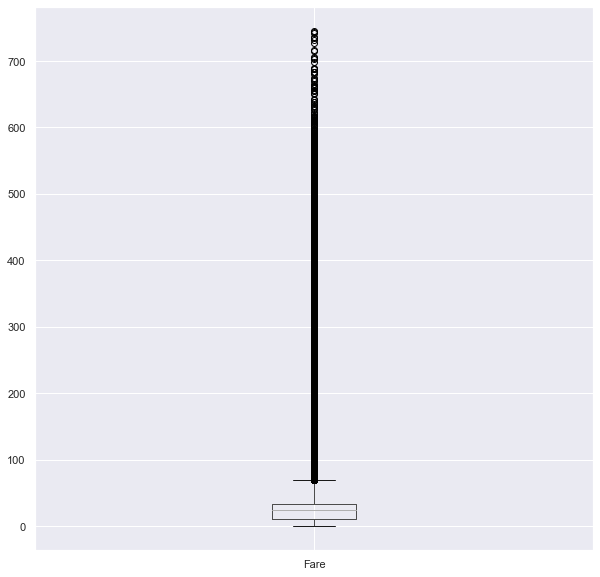

In [276]:
train_df.boxplot(column="Fare", figsize=(10, 10))

# Data exploration

> ## Survival target

Общее количество выживших и погибших

In [277]:
train_df1.groupby("Survived")["Survived"].count()

Survived
0    54290
1    39885
Name: Survived, dtype: int64

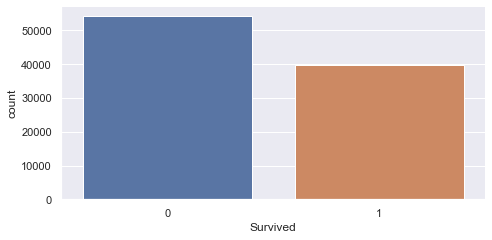

In [278]:
sns.catplot(x='Survived', data=train_df1, kind="count", aspect=2, height=3.5)

   > ### Survived-Sex

In [279]:
a = train_df1.groupby(["Sex", "Survived"])[["Survived"]].count()
a.rename(columns={"Survived":"Total"})

Total
Sex    Survived       
female 0         11585
       1         29057
male   0         42705
       1         10828

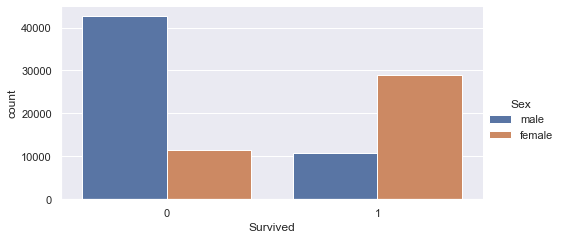

In [280]:
sns.catplot(x='Survived', data=train_df1, kind="count", hue='Sex',  aspect=2, height=3.5)

Поскольку мужчин и женщин разное количество, то абсолютные значения не демонстрируют точной картины. Для более детального исследования рассмотрим относительные показатели.

In [281]:
train_df1[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.714950
1,male,0.202268


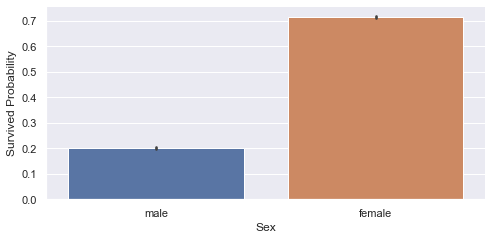

In [282]:
a = sns.catplot(x='Sex', y="Survived", data=train_df1, kind="bar", aspect=2, height=3.5)
a.set_ylabels("Survived Probability")
plt.show()

Таким образом можем наблюдать, что вероятность выживания у женщин была выше и составила 0.7. Среди мужчин выжило только 0.2.

   > ### Survived-Pclass

In [283]:
train_df1[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.580714
1,2,0.520666
2,3,0.222603


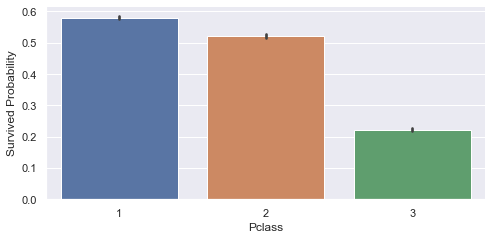

In [284]:
a = sns.catplot(x='Pclass', data=train_df1, kind="bar", y="Survived",  aspect=2, height=3.5)
a.set_ylabels("Survived Probability")
plt.show()

Наибольшая вероятность выживания была у пассажиров 1 класса.

   > ### Survived-Sex-Pclass

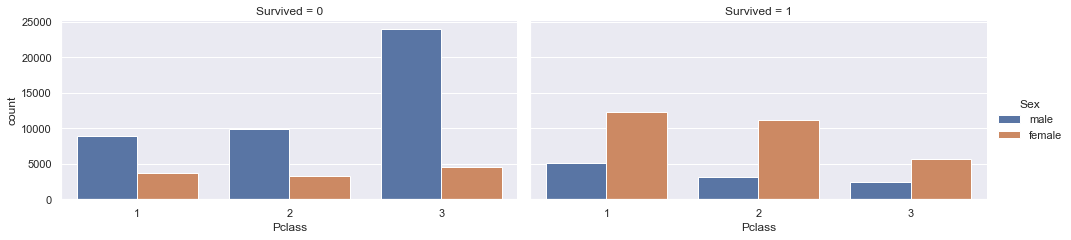

In [285]:
sns.catplot(x='Pclass', data=train_df1, kind="count", hue='Sex', col="Survived",  aspect=2, height=3.5)

   > ### Age-Survived

Text(0.5, 1.0, "Distribution of Passengers' Ages")

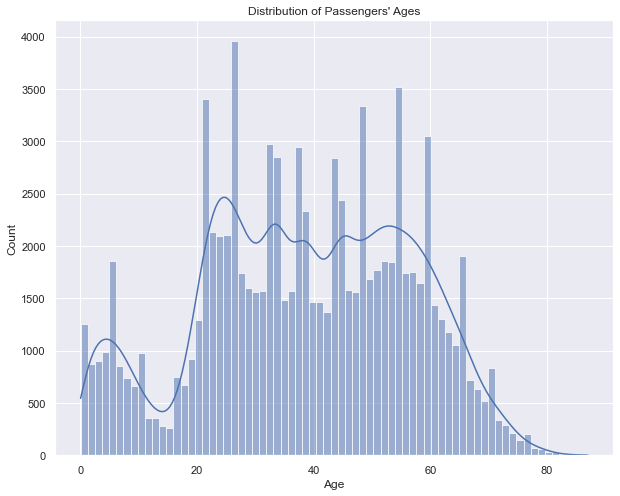

In [286]:
age_dist = sns.histplot(train_df1["Age"], kde=True)
age_dist.set_title("Distribution of Passengers' Ages")

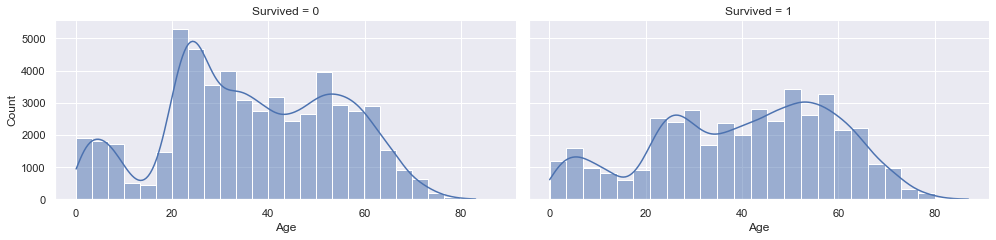

In [287]:
g = sns.FacetGrid(train_df, col = "Survived", aspect=2, height=3.5)
g.map(sns.histplot, "Age", bins = 25, kde=True)
plt.show()

В соответствии с двумя приведенными гистограмми выше разделим переменную Age на 4 возрастных интервала с последующей оценкой вероятности выживания для каждого из них.

In [288]:
train_df1["Age_range"] = train_df1["Age"]
train_df1["Age_range"].iloc[train_df1["Age"] <= 18] = "<= 18"
train_df1["Age_range"].iloc[(train_df1["Age"] > 18) & (train_df1["Age"] <= 32)] = "19-32"
train_df1["Age_range"].iloc[(train_df1["Age"] > 32) & (train_df1["Age"] <= 60)] = "33-60"
train_df1["Age_range"].iloc[(train_df1["Age"] > 60)] = "> 60"



D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


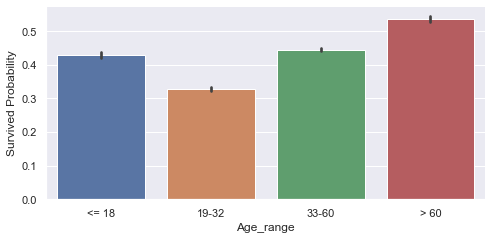

In [289]:
a = sns.catplot(x='Age_range', y="Survived", data=train_df1, kind="bar", aspect=2, height=3.5,
               order=["<= 18", "19-32", "33-60", "> 60"])
a.set_ylabels("Survived Probability")

Пассажиры, чей возраст превышал 60 лет выжили более чем в 50 %. Для возрастных групп до 18 лет и от 19 до 32 лет вероятность выживания была приблизительно одинакова и составляла порядка 40 %. Наименьшая вероятность выживания была для лиц в возрасте 33-60 лет.

   > ### Embarked-Pclass-Survived

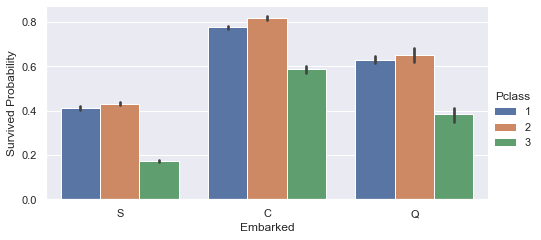

In [290]:
a = sns.catplot(x='Embarked', y="Survived", data=train_df1, kind="bar", hue='Pclass', aspect=2, height=3.5)
a.set_ylabels("Survived Probability")
plt.show()

Наибольшая выживаемость у пассажиров с  *C = Cherbourg*

> ### Family-Survived

In [291]:
train_df1["Family"] = train_df1["SibSp"] + train_df1["Parch"]

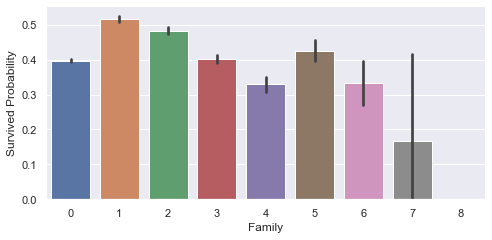

In [292]:
a = sns.catplot(x='Family', y="Survived", data=train_df1, kind="bar", aspect=2, height=3.5)
a.set_ylabels("Survived Probability")
plt.show()

Влияния количества членов семьи на вероятность выживания явно не наблюдается
Построим далее коррелиционную матрицу и проанализируем линейную зависимость между переменными.

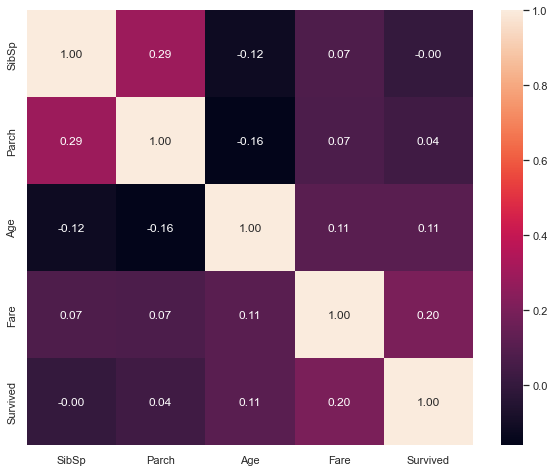

In [293]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df1[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Парная корреляция с переменной Survived не первышает 0.2, что свидетельствует о слабой корреляционной связи и практически отсутствии линейной зависимости.

> ## Age distribution

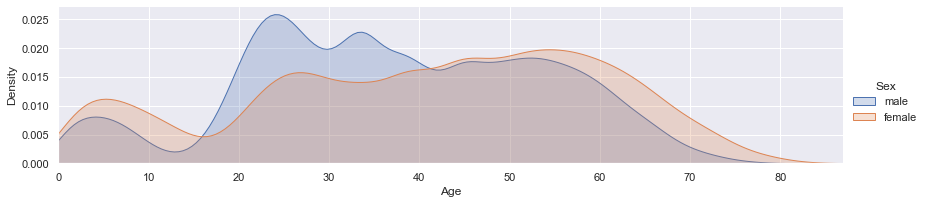

In [294]:
fig = sns.FacetGrid(train_df1, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = train_df1['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Наибольшее количество мужчин находилось в диапозоне 20-40 лет. Наибольшее же количество женщин было в диапозоне 50-65 лет.

# Conclusion

Таким образом можно заключить, что наибольшая вероятность выживания составляла:
- относительно пола: у женщин;
- относительно класса: 1 класс;
- относительно возраста: у лиц после 60.